# Bloch Sphere
The Bloch Sphere provides a way to clearly visualize transformations on a two level system - *qubit*. In this simple notebook you'll learn how to represent states on the Bloch Sphere and apply rotations on them. Rotations are the most general transformations on qubits.

## Basics of QuTiP

Documentation on the package as well as instructions on how to install it can be found at https://qutip.org/


##Preliminaries

For the excercise in this notebook, besides **QuTiP**, we need the **Numpy** and the **Matplotlib** packages.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

I have prepared this notebook in **Colab**, therefore I must install the **QuTiP** everytime I start my notebook. If you have a local installation of the package the first lines of the code bellow can be commented.

From **QuTip** we need:

* `basis`: Generates the vector representation of a Fock state.
* `Bloch`: Class for plotting data on the Bloch sphere.
* `sigmax`, `sigmay`, `sigmaz`: Pauli matrices.

In [33]:
try:
    import qutip
except:
    !pip install qutip
    import qutip

from qutip import * #basis, Bloch, sigmax, sigmay, sigmaz, operators
qutip.__version__

'5.1.1'

## States on the Bloch Sphere

As we have discussed in class, *qubit* states are parameterize by two real parameters. On the Bloch Sphere we choose the pair of angles $(\theta, \phi)$, where $0 \le \theta \le \pi$ and $0 \le \varphi \le 2\pi$ are the azimuthal and polar angle respectively, to write an artbitrary *qubit* state as
$$ |\psi \rangle = \cos(\theta) |0 \rangle + e^{i\phi} \sin(\theta) |1 \rangle .$$

Let us take a look at a couple of examples on the Bloch sphere:
* $|0\rangle$ (red) - $Z$ eigenstate.
* $|1\rangle$ (red) - $Z$ eigenstate.
* $\frac{1}{\sqrt{2}}(|0\rangle +|1\rangle)$ (green) - $X$ eigenstate.
* $\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ (green) - $Y$ eigenstate.

In [34]:
def qubit_state(theta, phi):
    'Define a qubit state'

    state = np.cos(theta) * basis(2,0) + np.exp(1j*phi) * np.sin(theta) * basis(2,1)

    return state

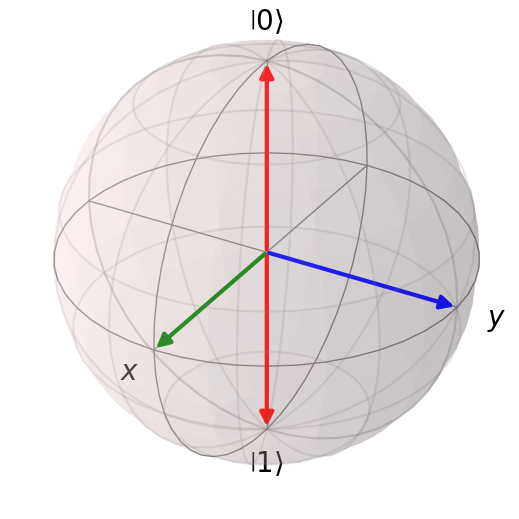

In [53]:
# create a clean Bloch Sphere
b = Bloch()

b.vector_color = ["r","r","g","b"] #make a list of color for the vectors

# adding the vectors to the plot
b.add_states(qubit_state(0,0))
b.add_states(qubit_state(np.pi/2,0))
b.add_states(qubit_state(np.pi/4,0))
b.add_states(qubit_state(np.pi/4,np.pi/2))

b # plots the Bloch sphere

# Bloch sphere -- Homework
## Problem (10 points).

The most common quantum logic gates for a single *qubit* use in quantum computation are the $X$, $Y$, $Z$, $H$ (Hadamard), $S$ (phase) and $\pi/8$ (or $T$). The last three gates are given by their matrix representation as:
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}, \quad S = \begin{pmatrix} 1&0 \\ 0&i \end{pmatrix},  \quad T = \begin{pmatrix} 1&0 \\ 0&e^{i\pi/4} \end{pmatrix}.$$

1. Build a program that for a given unitary transformation on a qubit finds the corresponding rotation. That is, it determine the rotation axis and the rotation angle. The program should illustrate the action of the rotation on the Bloch sphere.

  *Hint: Start with finding the eigenstates of the operators.*

2. Use the program with each of the six single *qubit* gates above.

  





















## Unitary transformations - Rotations

Unitary transformations acts on the Bloch sphere as rotations. Rotations $R_{\vec{n}}(\theta)$ around any axis $\vec{n} = (n_{x}, n_{y}, n_{z})$, with $n_{x},n_{y},n_{z} \in \mathcal{R}$ and $n_{x}^2 + n_{y}^2 + n_{z}^2 = 1$, are generated by the operator
$$ \sigma_{\vec{n}} = n_{x} X + n_{y} Y + n_{z} Z,$$
with
$$R_{\vec{n}}(\theta) = \cos(\theta/2) \mathcal{1} - i \sin(\theta/2) \sigma_{\vec{n}}.$$

In [36]:
def rotation_qubit(n_axis,theta):
    'rotation around a given axis (nx,ny,nz) by an angle theta'

    # operator basis
    one = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    # rotation axis renormalized
    old_norm = np.linalg.norm((n_axis[0],n_axis[1],n_axis[2]))
    nx = n_axis[0]/old_norm
    ny = n_axis[1]/old_norm
    nz = n_axis[2]/old_norm

    # rotation axis operator
    sigma_n = nx * sx + ny * sy + nz * sz

    # rotation operator
    R = np.cos(theta/2)*one + 1j*np.sin(theta/2)*sigma_n

    return R

Let us visualize the rotation of the state $|0\rangle$ on the Bloch sphere around the $(2,1,0)$ axis by the angle $\theta = \pi/2$.

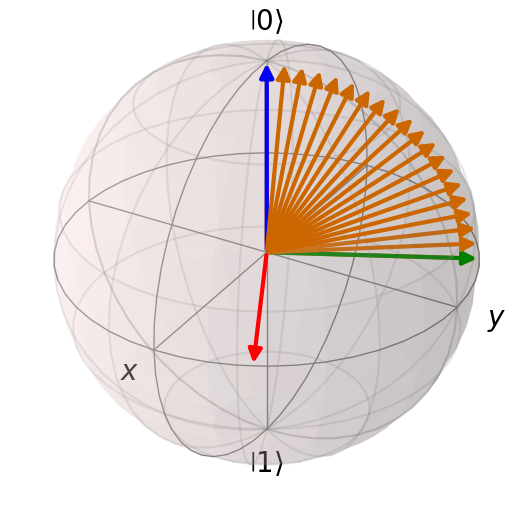

In [83]:
b.clear() # remove the current data from the Bloch sphere

axis = (2,1,0) # axis of rotation
axis = axis / np.linalg.norm(axis) # normalized axis of rotation

steps = np.linspace(0, np.pi/2, 20) # angle steps for the rotation

b.add_vectors(axis,colors=["r"])              # vector of the rotation axis

# intermediate steps of the rotation
for i in steps:
    b.add_states(rotation_qubit(axis,i) * qubit_state(0,0), colors=["#CC6600"])

b.add_states(qubit_state(0,0), colors=["b"])  # vector of the initial state
b.add_states(rotation_qubit(axis,steps[-1]) * qubit_state(0,0), colors=["g"])    # final state after the rotation

b # plots the Bloch sphere